# Import necessary libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    Input,
)
import numpy as np
import matplotlib.pyplot as plt
import random

# Load Dataset

### Load training and testing data from CSV files

In [2]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

# Reshape the dataset to match the expected input shape for the model

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3) / 255.0
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3) / 255.0
Y_test = Y_test.reshape(len(Y_test), 1)

# Data Augmentation

In [4]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
datagen.fit(X_train)

# Build the CNN Model

In [5]:
model = Sequential(
    [
        Input(shape=(100, 100, 3)),
        Conv2D(32, (3, 3), activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(128, (3, 3), activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model

In [7]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

# Callbacks for Optimization

In [9]:
early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, verbose=1)

# Train the model

In [12]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 899ms/step - accuracy: 0.6422 - loss: 0.6188 - val_accuracy: 0.6350 - val_loss: 0.7328 - learning_rate: 2.0000e-04
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 804ms/step - accuracy: 0.6453 - loss: 0.6175 - val_accuracy: 0.6525 - val_loss: 0.7204 - learning_rate: 2.0000e-04
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6485 - loss: 0.6133 - val_accuracy: 0.6500 - val_loss: 0.6955 - learning_rate: 2.0000e-04
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6558 - loss: 0.6206 - val_accuracy: 0.6500 - val_loss: 0.6919 - learning_rate: 2.0000e-04
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6653 - loss: 0.6078 - val_accuracy: 0.6825 - val_loss: 0.6366 - learning_rate: 2.0000e-04
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6656 - loss: 0.6060 - val_accuracy: 0.7100 - val_loss: 0.5884 - learning_rate: 2.0000e-04
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6751 -

# Evaluate the model on test data

In [13]:
evaluation_results = model.evaluate(X_test, Y_test)
print("Test Accuracy: {:.2f}%".format(evaluation_results[1] * 100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7478 - loss: 0.4973
Test Accuracy: 70.75%


# Making predictions

### Visualize a random test image

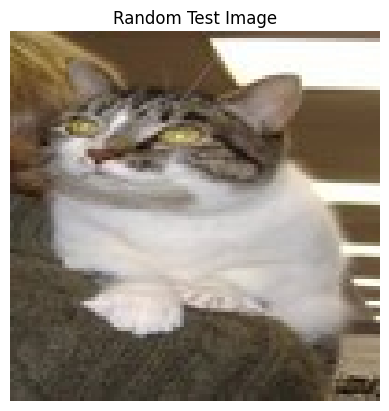

In [29]:
idx2 = random.randint(0, len(Y_test) - 1)
plt.imshow(X_test[idx2, :])
plt.title("Random Test Image")
plt.axis('off')
plt.show()


# Predict the class of the random test image

In [30]:
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[[0.8331741]]


# Determine the predicted class

In [31]:
if y_pred >= 0.5:
    pred= 'cat'
else:
    pred= 'dog'
print("Our model says it is a:", pred)

Our model says it is a: cat
